<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/05-Principal-Component-Analysis-(PCA)/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Concepts

**PCA** (Principal Component Analysis) is a dimensionality reduction method that transforms high-dimensional data into a new coordinate system of orthogonal axes, called principal components. These axes capture the most significant patterns of variance in the data. **Eigenvalues** in PCA indicate the magnitude of these variances: a larger eigenvalue for a principal component implies that more of the data's variance is aligned with that axis. Simply put, eigenvalues represent the **"importance"** or **"information content"** of each principal component.

In [1]:
from sympy import *
import numpy as np

# Define a matrix B
B = Matrix([[0, 1, 0], [0, 0, 1], [4, -17, 8]])

# Compute the eigenvectors and eigenvalues of matrix B
vec = B.eigenvects()
eig = B.eigenvals()

# Function to print in LaTeX format
def print_latex(obj, description):
    latex_code = latex(obj)                     # Use sympy's latex function to convert the object to latex
    print(f"{description}:\n${latex_code}$\n")  # Display with description and latex code

# Print eigenvalues and eigenvectors in LaTeX format
print_latex(eig, "Eigenvalues")
print_latex(vec, "Eigenvectors")


Eigenvalues:
$\left\{ 4 : 1, \  2 - \sqrt{3} : 1, \  \sqrt{3} + 2 : 1\right\}$

Eigenvectors:
$\left[ \left( 4, \  1, \  \left[ \left[\begin{matrix}\frac{1}{16}\\\frac{1}{4}\\1\end{matrix}\right]\right]\right), \  \left( 2 - \sqrt{3}, \  1, \  \left[ \left[\begin{matrix}4 \sqrt{3} + 7\\\sqrt{3} + 2\\1\end{matrix}\right]\right]\right), \  \left( \sqrt{3} + 2, \  1, \  \left[ \left[\begin{matrix}7 - 4 \sqrt{3}\\2 - \sqrt{3}\\1\end{matrix}\right]\right]\right)\right]$



Eigenvalues:

$\left\{ 4 : 1, \  2 - \sqrt{3} : 1, \  \sqrt{3} + 2 : 1\right\}$

Eigenvectors:

$\left[ \left( 4, \  1, \  \left[ \left[\begin{matrix}\frac{1}{16}\\\frac{1}{4}\\1\end{matrix}\right]\right]\right), \  \left( 2 - \sqrt{3}, \  1, \  \left[ \left[\begin{matrix}4 \sqrt{3} + 7\\\sqrt{3} + 2\\1\end{matrix}\right]\right]\right), \  \left( \sqrt{3} + 2, \  1, \  \left[ \left[\begin{matrix}7 - 4 \sqrt{3}\\2 - \sqrt{3}\\1\end{matrix}\right]\right]\right)\right]$


# PCA Implementation

In [90]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [91]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The Iris dataset is a classic dataset introduced by Sir Ronald Fisher in 1936. It contains 150 samples from three species of Iris flowers: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features: sepal length, sepal width, petal length, and petal width. It's often used in pattern recognition literature and serves as an introductory dataset for machine learning and data visualization.

In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:,[0,1]], y, test_size=0.25, random_state=40)

# Train a Decision Tree classifier on original data
clf_original = DecisionTreeClassifier()
clf_original.fit(X_train, y_train)

# Predict using the test set
y_pred_original = clf_original.predict(X_test)

In [93]:
# Apply PCA and retain 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

By applying PCA on the Iris dataset, one can reduce the four original features to two principal components that still capture a significant amount of the data's variance. This transformed dataset, while being of lower dimensionality, retains most of the original information. Visualizing the data in this reduced space often reveals clear patterns and clusters, corresponding to the three different species, which might be more challenging to discern in the original 4-dimensional space.

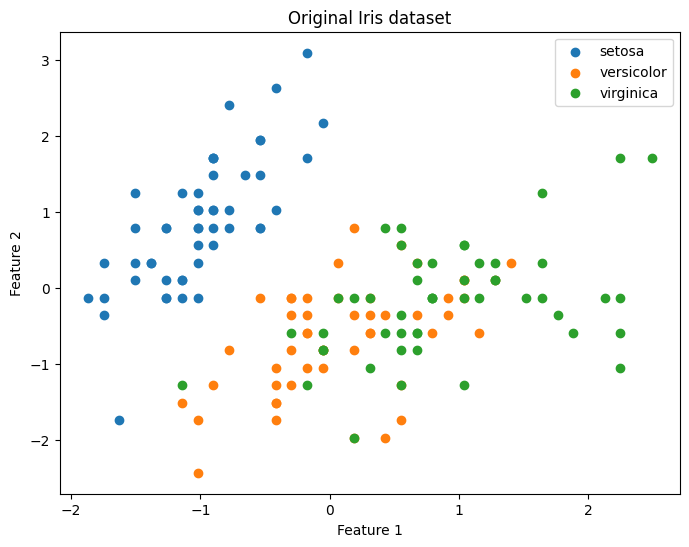

In [94]:
# Visualize the original data
plt.figure(figsize=(8, 6))
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=target_name)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original Iris dataset')
plt.show()

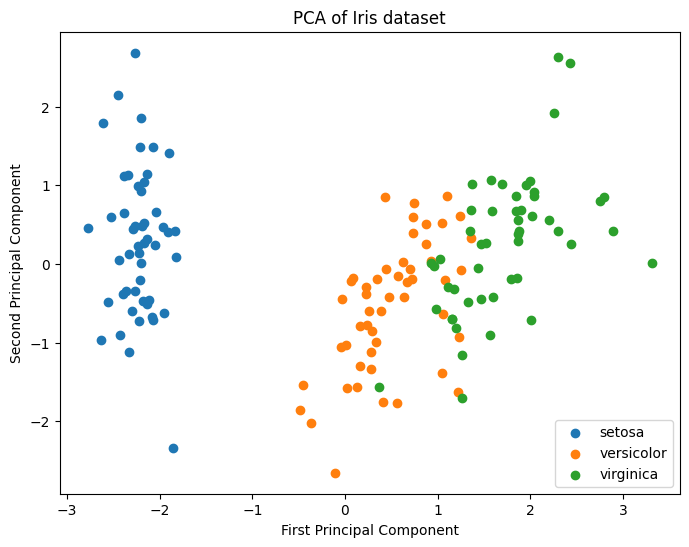

In [95]:
# Visualize data in the first two principal components
plt.figure(figsize=(8, 6))
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA of Iris dataset')
plt.show()

In [96]:
# Train a Decision Tree classifier on transformed data
X_train_pca, X_test_pca, y_train, y_test_p = train_test_split(X_pca[:,[0,1]], y, test_size=0.25, random_state=40)
clf_pca = DecisionTreeClassifier()
clf_pca.fit(X_train_pca, y_train)

# Predict using the test set
y_pred_pca = clf_pca.predict(X_test_pca)

In [97]:
# Calculate and display metrics for original data
print("Original Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Precision:", precision_score(y_test, y_pred_original, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_original, average='weighted'))
print("\n")

# Calculate and display metrics for transformed data
print("PCA Transformed Data:")
print("Accuracy:", accuracy_score(y_test_p, y_pred_pca))
print("Precision:", precision_score(y_test_p, y_pred_pca, average='weighted'))
print("Recall:", recall_score(y_test_p, y_pred_pca, average='weighted'))

Original Data:
Accuracy: 0.7368421052631579
Precision: 0.7280701754385964
Recall: 0.7368421052631579


PCA Transformed Data:
Accuracy: 0.8947368421052632
Precision: 0.9020979020979021
Recall: 0.8947368421052632


The original Iris data has two of four dimensions. Because, having many features can sometimes lead to overfitting, especially with small datasets. On the other hand, after PCA transformation, the data can be represented with fewer dimensions (two), which still capture the essence of the data. Classifying this transformed data might result in simpler models that generalize better.